In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n = 10
n_test = 100
noise = 0.02

sinusoidal = lambda X: np.sin(2 * np.pi * X)

X = np.linspace(0, 1, n)[:, np.newaxis]
Y = sinusoidal(X) + noise * np.random.normal(size=n)[:, np.newaxis]

X_test = np.linspace(0, 1, n_test)[:, np.newaxis]
Y_true = sinusoidal(X_test)

In [5]:
poly = PolynomialRegression(9)
poly_costs = poly.train(X, Y, 4000, 0.2)

In [6]:
ridge_poly = PolynomialRegression(9)
ridge_poly_costs = ridge_poly.train(X, Y, 4000, 0.06, ridge=0.001)

In [7]:
lasso_poly = PolynomialRegression(9)
lasso_poly_costs = lasso_poly.train(X, Y, 4000, 0.06, lasso=0.001)

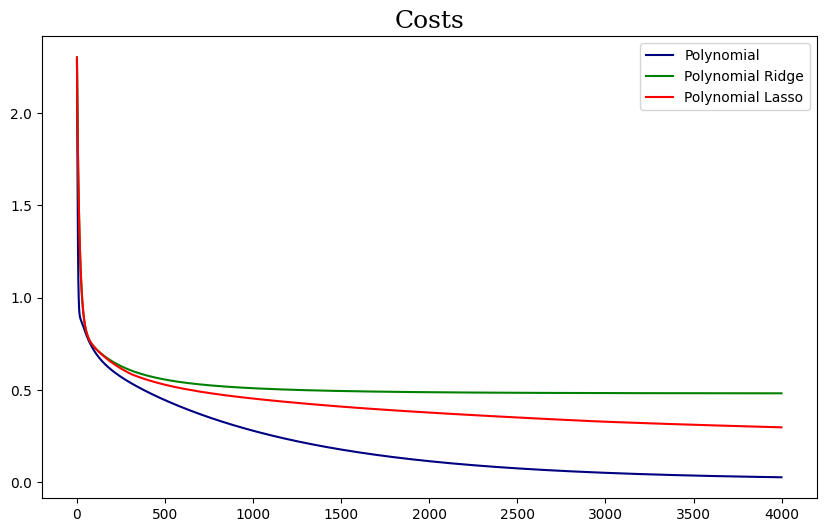

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(poly_costs, color="navy", label="Polynomial")
plt.plot(ridge_poly_costs, color="green", label="Polynomial Ridge")
plt.plot(lasso_poly_costs, color="red", label="Polynomial Lasso")

plt.title("Costs", size=18, family="serif")
plt.legend(loc="upper right")

plt.show()

In [9]:
poly_pred = np.array(list(map(poly, X_test)))
poly_ridge_pred = np.array(list(map(ridge_poly, X_test)))
poly_lasso_pred = np.array(list(map(lasso_poly, X_test)))

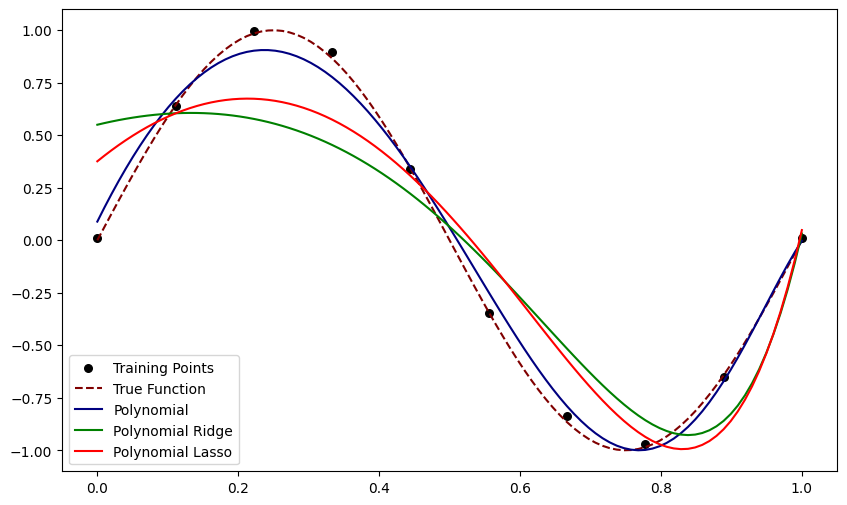

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color="black", s=30, marker="o", label="Training Points")

plt.plot(X_test, Y_true, color='maroon', linestyle="dashed", label="True Function")

plt.plot(X_test, poly_pred, color="navy", label="Polynomial")

plt.plot(X_test, poly_ridge_pred, color="green", label="Polynomial Ridge")

plt.plot(X_test, poly_lasso_pred, color="red", label="Polynomial Lasso")

plt.legend(loc="lower left")
plt.show()

In [11]:
bayesian = BayesianRegression(degree=9, noise=0.02)
bayesian.train(X, Y)

In [12]:
bayesian_ridge = BayesianRegression(degree=9, noise=0.02)
bayesian_ridge.train(X, Y, ridge=1)

In [13]:
bayesian_pred = bayesian(X_test)
bayesian_ridge_pred = bayesian_ridge(X_test)

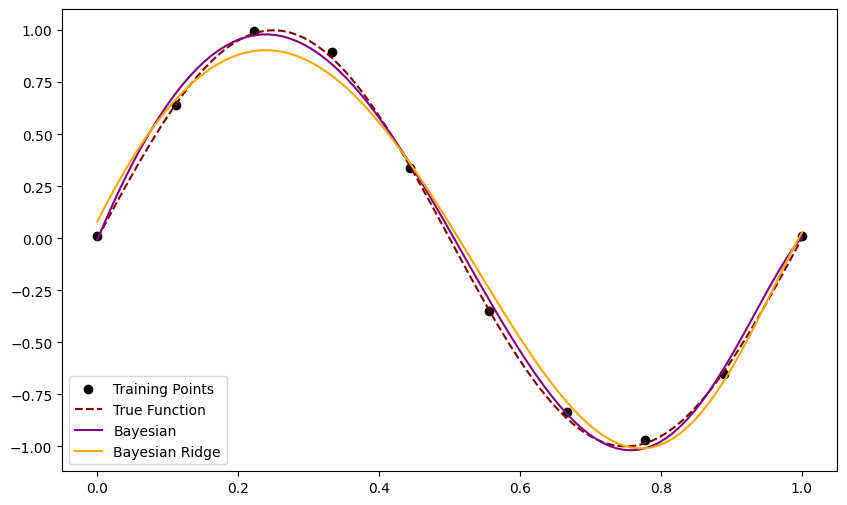

In [14]:
plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color="black", label="Training Points")

plt.plot(X_test, Y_true, color='maroon', linestyle="dashed", label="True Function")

plt.plot(X_test, bayesian_pred, color="purple", label="Bayesian")

plt.plot(X_test, bayesian_ridge_pred, color="orange", label="Bayesian Ridge")

plt.legend(loc = "lower left")
plt.show()

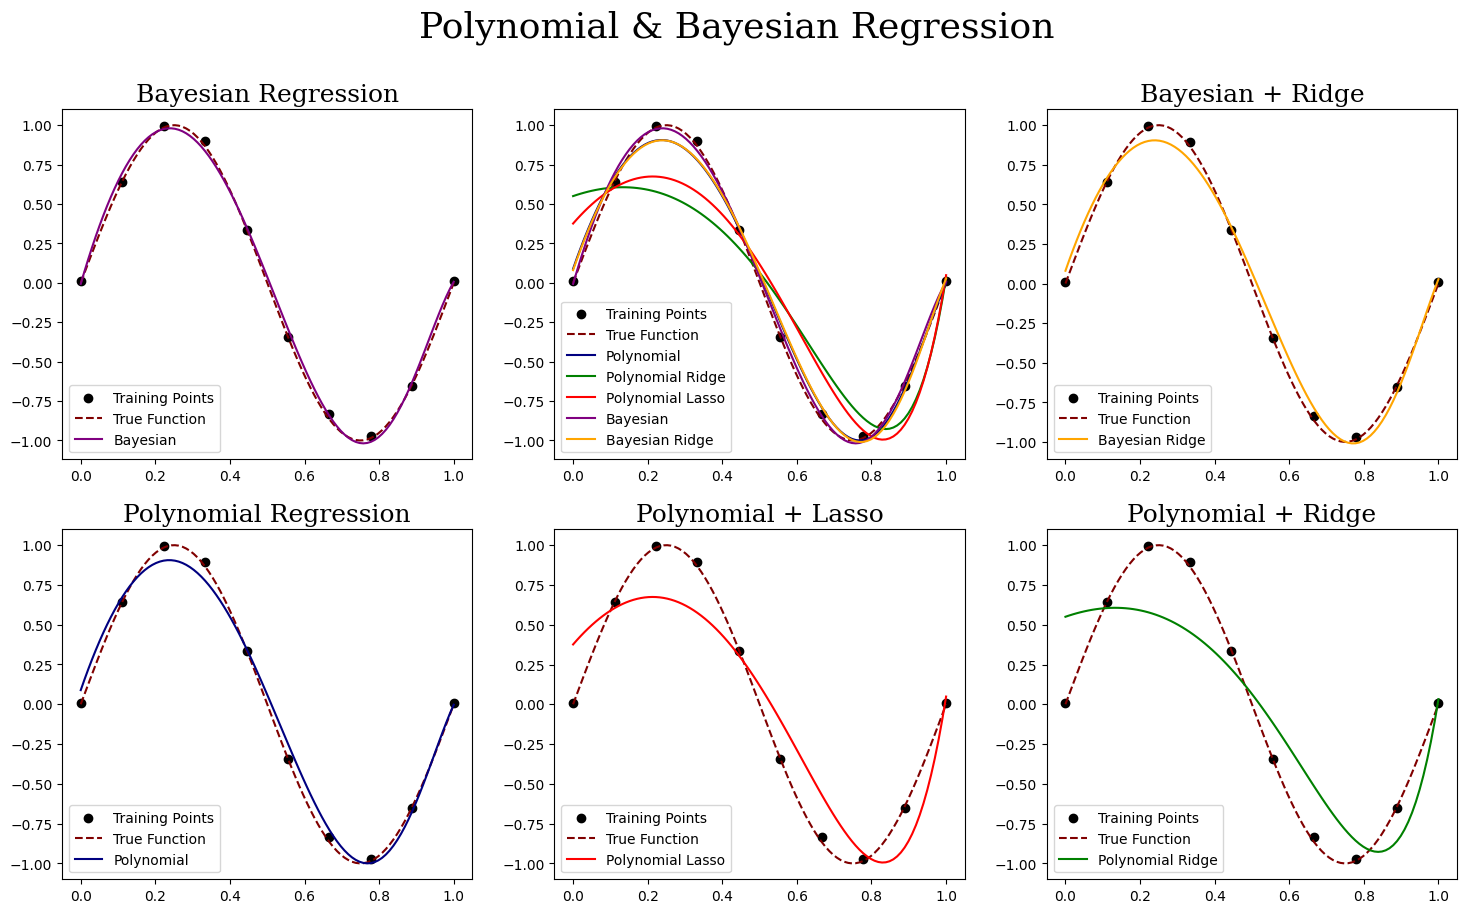

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs = axs.flatten()

for ax in axs:
    ax.scatter(X, Y, color="black", label="Training Points")
    ax.plot(X_test, Y_true, color="maroon", linestyle="dashed", label="True Function")

axs[0].plot(X_test, bayesian_pred, color="purple", label="Bayesian")
axs[0].set_title("Bayesian Regression", size=18, family="serif")
axs[0].legend(loc = "lower left")

axs[1].plot(X_test, poly_pred, color="navy", label="Polynomial")
axs[1].plot(X_test, poly_ridge_pred, color="green", label="Polynomial Ridge")
axs[1].plot(X_test, poly_lasso_pred, color="red", label="Polynomial Lasso")
axs[1].plot(X_test, bayesian_pred, color="purple", label="Bayesian")
axs[1].plot(X_test, bayesian_ridge_pred, color="orange", label="Bayesian Ridge")
axs[1].legend(loc = "lower left")

axs[2].plot(X_test, bayesian_ridge_pred, color="orange", label="Bayesian Ridge")
axs[2].set_title("Bayesian + Ridge", size=18, family="serif")
axs[2].legend(loc = "lower left")

axs[3].plot(X_test, poly_pred, color="navy", label="Polynomial")
axs[3].set_title("Polynomial Regression", size=18, family="serif")
axs[3].legend(loc = "lower left")

axs[4].plot(X_test, poly_lasso_pred, color="red", label="Polynomial Lasso")
axs[4].set_title("Polynomial + Lasso", size=18, family="serif")
axs[4].legend(loc = "lower left")

axs[5].plot(X_test, poly_ridge_pred, color="green", label="Polynomial Ridge")
axs[5].set_title("Polynomial + Ridge", size=18, family="serif")
axs[5].legend(loc = "lower left")

fig.suptitle("Polynomial & Bayesian Regression", size=26, family="serif")

plt.show()